# OneClassSVM

In [125]:
import pandas as pd
import numpy as np

data = pd.read_csv("./Output/data_pretraite_svm.csv", sep=';', index_col = 0)
data = data.sort_values( by = 'N20')
data.head()

,N20,Date,Bande,soilH_H1,soilH_H2,NO3_H1,NO3_H2,NH4_H1,NH4_H2,Temp moyenne (°C) J1,...,Temp min J30,acs,bi,bio,elev,pn,ref,week,month,year
60,-1.393499,2018-06-28,acs,0.115083,0.123920,9.704488,9.603074,0.619208,1.086268,62.0,...,13.126667,1.0,0.0,0.0,0.0,0.0,0.0,26,6,2018
69,-0.436746,2018-07-11,elev,0.070751,0.099841,3.593315,5.343852,0.469527,0.300458,73.0,...,13.543333,0.0,0.0,0.0,1.0,0.0,0.0,28,7,2018
330,-0.390366,2021-02-08,ref,0.222509,0.218402,6.047582,7.285328,1.889869,1.419856,86.0,...,3.350000,0.0,0.0,0.0,0.0,0.0,1.0,6,2,2021
71,-0.323810,2018-07-11,ref,0.079820,0.101607,3.877878,6.230485,0.417917,0.236737,73.0,...,13.543333,0.0,0.0,0.0,0.0,0.0,1.0,28,7,2018
233,-0.249388,2019-11-05,pn,0.208135,0.202400,1.366935,0.914537,3.321413,3.785169,87.0,...,9.936667,0.0,0.0,0.0,0.0,1.0,0.0,45,11,2019


In [116]:
X = data.copy()
X = X.drop(X.columns[[1]], axis=1)
X = X.drop(X.columns[[1]], axis=1)
print(range(X.shape[1]))
# print(X.columns[23])
# X.isna().sum()

range(0, 36)


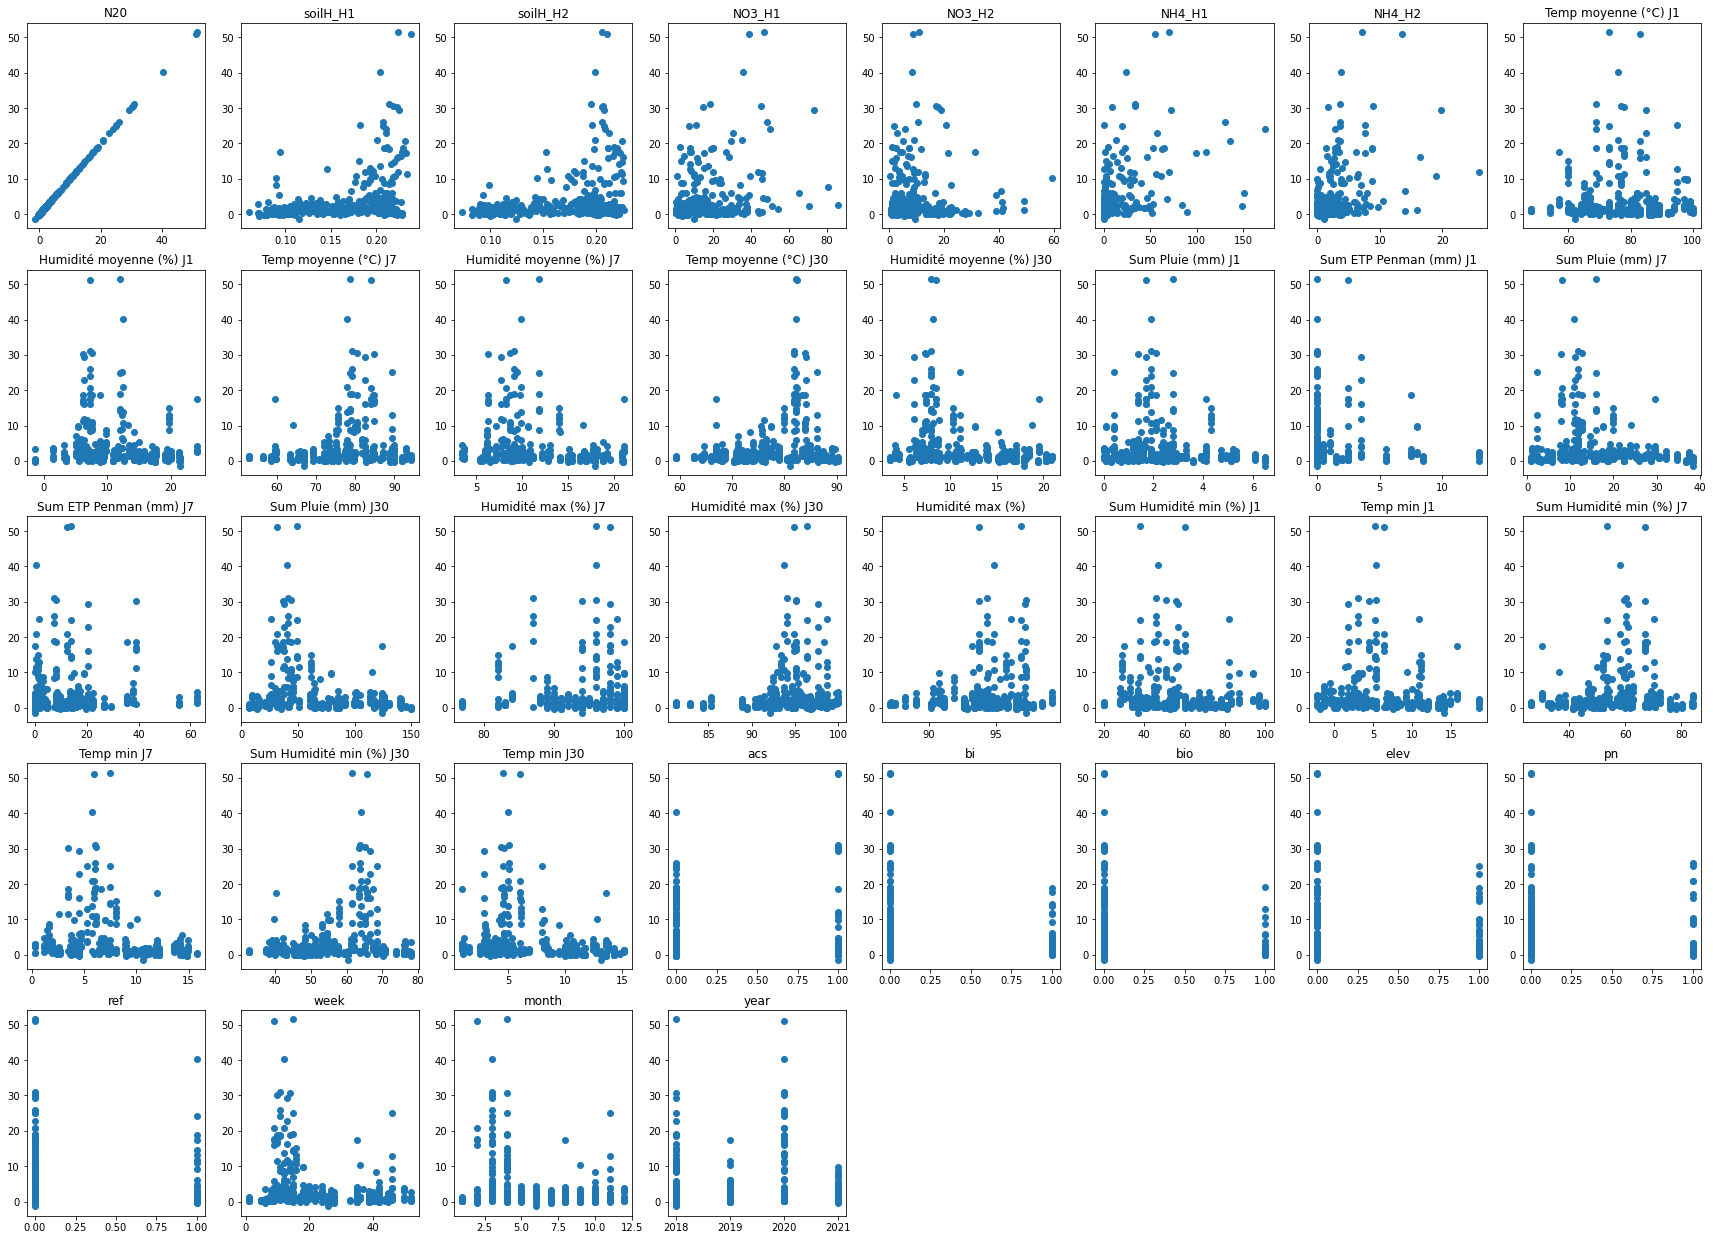

In [117]:
import matplotlib.pyplot as plt


plt.figure(figsize=(30,10))

for i, name_c in enumerate(X.columns) :
    plt.subplot(6,8,i + 1)
    plt.subplots_adjust(bottom=1, top=3) 
    plt.scatter(X[name_c], X[X.columns[:1]])
    plt.title(name_c)


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

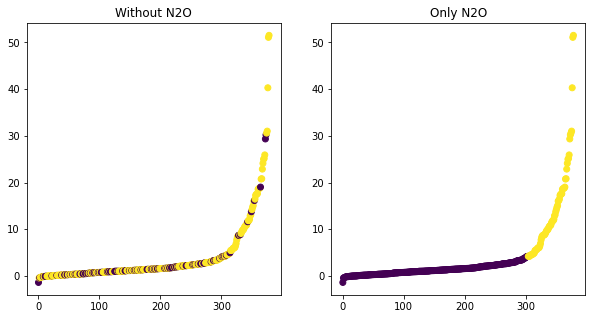

In [118]:
from sklearn.svm import OneClassSVM

train = X.copy()

y = train[train.columns[:1]]
train = train[train.columns[1:]]


clf = OneClassSVM(gamma= 'auto', nu = 0.5, kernel= 'rbf') 
clf.fit(train)
Z = clf.predict(train)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
# plt.scatter(range(len(train[train.columns[:1]])),train[train.columns[:1]], c= Z)
plt.scatter(range(len(y)),y, c= Z)

plt.title("Without N2O")


clf_y = OneClassSVM(gamma= 'auto', nu = 0.8, kernel= 'linear')
clf_y.fit(y)
Z_y = clf_y.predict(y)
plt.subplot(1,2,2)
plt.scatter(range(len(y)),y, c= Z_y)
plt.title("Only N2O")

print(Z_y) # Z_y + Date + Bande 


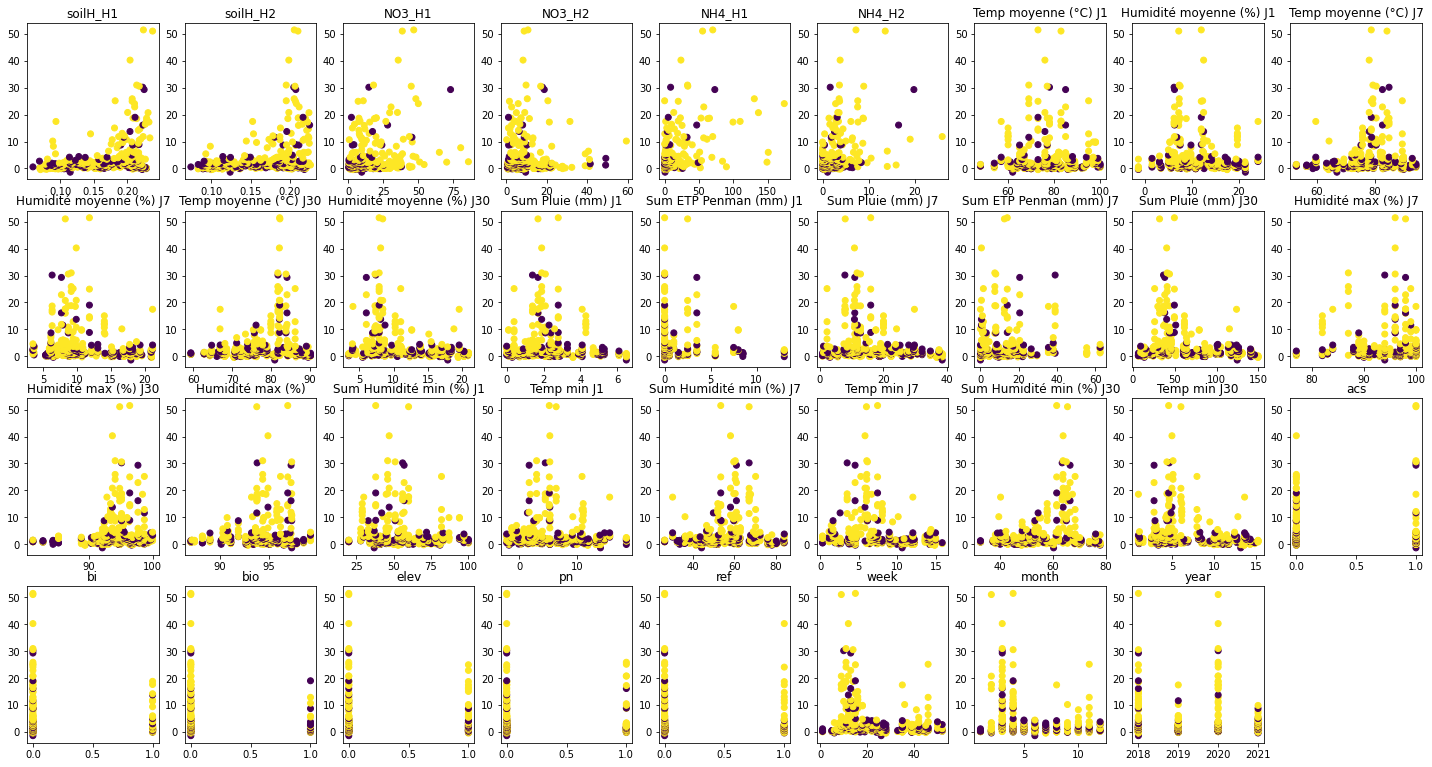

In [119]:
Z = clf.predict(train)
Z = Z.reshape(-1,1)

plt.figure(figsize=(25,5))
# plt.scatter(X[X.columns[:1]], X[X.columns[:1]], c= Z)
# for i, name_c in enumerate(train.columns) :
for i, name_c in enumerate(train) :
    plt.subplot(4,9,i + 1)
    # plt.scatter(train[name_c],train[train.columns[:1]], c= Z)
    plt.subplots_adjust(bottom=1, top=3) 
    plt.scatter(train[name_c],y, c= Z)
    plt.title(name_c)

    # plt.scatter(X1[:, i],X1[:, 0], c= Z)
    # plt.scatter(X_selected[:, i],y, c= Z)

In [120]:
data['Pic'] = Z_y

In [124]:
data.head()
data.to_csv("./Output/data_svm_result.csv", sep=";")